In [1]:
#import libraries needed for the project

import os
import string
import csv
import pandas
import numpy as np
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt

In [2]:
def SetWorkingDirectory():
    #set the working directory to the same path as this file. The data file must be in the same folder
    abspath = os.path.abspath('LewisRebecca_FinalProject')
    dname = os.path.dirname(abspath)
    os.chdir(dname)
    

In [3]:
def OpenFileReturnDF():

    #set the working directory
    SetWorkingDirectory()
    
    #Open the File; if it can't be found, notify the user and exit the program

    df = pandas.read_csv("CLEAN_charity_data.csv", dtype={'category': str,'name': str, 'ein': str, 'tot_exp': float, 'fund_eff': float,
                                                      'leader_comp': float, 'tot_rev': float, 'state': str, 'size':str,
                                                      'program_exp': float, 'admin_exp': float, 'fund_exp': float})
    
    df.rename(columns={"size": "ch_size"}, inplace=True)
    pandas.set_option('display.float_format', lambda x: '%.2f' % x)
    net_revenue = df['tot_rev'] - df['tot_exp']
    df['net_rev'] = net_revenue
    df = df.reindex(columns = ['ein', 'category', 'name', 'ch_size', 'state', 'tot_exp', 'tot_rev', 'net_rev', 'fund_eff', 'leader_comp', 'fund_exp', 'admin_exp', 'program_exp'])
    
    return df[['ein', 'category', 'name', 'ch_size', 'state', 'tot_exp', 'tot_rev', 'net_rev', 'fund_eff', 'leader_comp', 'fund_exp', 'admin_exp', 'program_exp']]
 

# Initial Exploration

In [4]:
charityDF = OpenFileReturnDF()

charityDF

,ein,category,name,ch_size,state,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
0,93-0642086,Environment,1000 Friends of Oregon,small,OR,917313.00,1022513.00,105200.00,0.18,0.00,168785.59,92648.61,654961.48
1,31-1770828,"Arts, Culture, Humanities",WYPR,mid,MD,5053059.00,5685761.00,632702.00,0.05,163341.00,161697.89,1167256.63,3713998.37
2,91-1857425,Religion,VSS Catholic Communications,small,NE,1891500.00,2140836.00,249336.00,0.17,114791.00,372625.50,215631.00,1299460.50
3,51-0145980,"Arts, Culture, Humanities",Utah Symphony & Opera,big,UT,22506582.00,22203175.00,-303407.00,0.08,124805.00,1215355.43,2070605.54,19175607.86
4,22-2579809,Human Services,Two Ten Footwear Foundation,mid,MA,5594243.00,6935506.00,1341263.00,0.12,219002.00,682497.65,704874.62,4195682.25
5,15-0623468,"Arts, Culture, Humanities",Syracuse Stage,mid,NY,5682361.00,5672247.00,-10114.00,0.06,65663.00,221612.08,1318307.75,4136758.81
6,95-6006642,Religion,Quiet Hour Ministries,small,CA,2691787.00,3189235.00,497448.00,0.19,84760.00,497980.59,637953.52,1553161.10
7,26-2176362,Education,"Put On The BRAKES, B.R.A.K.E.S.",small,NC,3174615.00,3671779.00,497164.00,0.08,150000.00,212699.20,225397.67,2733343.52
8,43-1426384,Human Services,Ozarks Food Harvest,big,MO,30424252.00,32837895.00,2413643.00,0.02,133303.00,608485.04,638909.29,29116009.16
9,13-3471084,Education,NYC Outward Bound Schools,mid,NY,6541364.00,6403194.00,-138170.00,0.17,196779.00,621429.58,353233.66,5560159.40


In [5]:
# The count of leader compensation is less than the total number of rows in the dataframe and the min is 0.  
# Below is a subset of the non-profits with leader compensation of 0.  I spot checked many of the records on charity
# navigator's website and some leaders do not receive compensation.  I am leaving them in the analysis as this could
# have an impact on fundraising.

leader_0 = charityDF[charityDF['leader_comp'] == 0]
leader_0

,ein,category,name,ch_size,state,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
0,93-0642086,Environment,1000 Friends of Oregon,small,OR,917313.00,1022513.00,105200.00,0.18,0.00,168785.59,92648.61,654961.48
30,94-3050254,Education,Issaquah Schools Foundation,small,WA,1780418.00,1884567.00,104149.00,0.14,0.00,268843.12,254599.77,1253414.27
52,01-0651843,Community Development,Iranian American Jewish Federation of New York,mid,NY,4104978.00,4440104.00,335126.00,0.08,0.00,410497.80,147779.21,3538491.04
65,13-3292137,Health,Interstitial Cystitis Association,small,VA,766632.00,547011.00,-219621.00,0.17,0.00,91229.21,65930.35,607939.18
71,54-1784426,Health,International Waldenstrom's Macroglobulinemia ...,small,FL,2762604.00,2810867.00,48263.00,0.11,0.00,375714.14,193382.28,2187982.37
139,59-1224041,Human Services,Inter-Faith Council for Social Service,small,NC,2451180.00,2313911.00,-137269.00,0.03,0.00,134814.90,367677.00,1946236.92
182,05-0272278,Human Services,INSIGHT,small,RI,848297.00,1134480.00,286183.00,0.07,0.00,31386.99,125547.96,690513.76
187,38-1903026,Community Development,Inner City Christian Federation,mid,MI,3981359.00,7023917.00,3042558.00,0.19,0.00,350359.59,437949.49,3185087.20
212,52-1555563,International,"India Development and Relief Fund, Inc. (IDRF)",small,MD,1974078.00,2070847.00,96769.00,0.01,0.00,9870.39,59222.34,1901037.11
215,94-3008370,Research and Public Policy,The Independent Institute,small,CA,3196579.00,3013395.00,-183184.00,0.09,0.00,313264.74,172615.27,2707502.41


In [6]:
#check for null values
charityDF.isnull().sum()

ein              0
category         0
name             0
ch_size          0
state            0
tot_exp          0
tot_rev          0
net_rev          0
fund_eff         0
leader_comp    436
fund_exp         0
admin_exp        0
program_exp      0
dtype: int64

In [7]:
#view the null values for leader_comp
leader_null = charityDF[charityDF['leader_comp'].isnull()]
leader_null

# These results were all over the place.  Some of the charities I searched had leaders that were listed as not compensated,
# but many others were listed as none reported.  There were also a few that were reported as having a salary.  

#I'm not sure what to do with these just yet, I will re-evaluate after I look at the graphs.


,ein,category,name,ch_size,state,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
21,75-1680391,Religion,Zola Levitt Ministries,mid,TX,3707618.00,3665100.00,-42518.00,0.01,nan,22245.71,608049.35,3069907.70
32,13-2909403,Education,Israel Scholarship Education Foundation,small,NY,1579306.00,1584108.00,4802.00,0.16,nan,270061.33,241633.82,1066031.55
48,86-0930096,"Arts, Culture, Humanities",Irish Cultural Center,small,AZ,859521.00,559805.00,-299716.00,0.09,nan,29223.71,122911.50,706526.26
74,52-2241212,Human and Civil Rights,International Senior Lawyers Corporation,small,NY,1291304.00,1074993.00,-216311.00,0.11,nan,135586.92,90391.28,1062743.19
87,91-1080666,Religion,International Needs,small,MI,2927719.00,2896273.00,-31446.00,0.07,nan,219578.92,222506.64,2479777.99
111,02-0482584,"Arts, Culture, Humanities",International Churchill Society,small,DC,947322.00,563336.00,-383986.00,0.07,nan,46418.78,118415.25,780593.33
128,04-2104853,Human Services,Interfaith Social Services,small,MA,1687636.00,1760109.00,72473.00,0.06,nan,104633.43,97882.89,1483432.04
172,51-0192436,International,Institute for Foreign Policy Analysis,small,MA,935517.00,703302.00,-232215.00,0.05,nan,47711.37,418176.10,468694.02
202,35-1405179,"Arts, Culture, Humanities",Indianapolis Opera Company,small,IN,1109270.00,1112935.00,3665.00,0.16,nan,122019.70,237383.78,748757.25
207,65-0230079,Community Development,Indian River Habitat for Humanity,mid,FL,5733247.00,6341218.00,607971.00,0.13,nan,321061.83,269462.61,5136989.31


# Categorical Summaries

In [8]:
# the charities studied fell into the following categories
charityDF.ch_size.value_counts().sort_index()


big      1450
mid      2908
small    4050
Name: ch_size, dtype: int64

In [9]:
# category counts
charityDF.category.value_counts().sort_index()

Animals                        454
Arts, Culture, Humanities     1218
Community Development          803
Education                      667
Environment                    429
Health                         847
Human Services                2379
Human and Civil Rights         346
International                  610
Religion                       450
Research and Public Policy     205
Name: category, dtype: int64

In [10]:
# state counts
charityDF.state.value_counts().sort_index()

AK     17
AL     66
AR     31
AZ    124
CA    992
CO    246
CT    130
DC    447
DE     23
FL    423
GA    207
HI     28
IA     47
ID     20
IL    309
IN    129
KS     57
KY     73
LA     60
MA    344
MD    167
ME     48
MI    201
MN    209
MO    156
MS     37
MT     44
NC    195
ND      8
NE     61
NH     33
NJ    166
NM     36
NV     33
NY    963
OH    250
OK     80
OR    115
PA    293
PR      3
RI     31
SC     75
SD     23
TN    176
TX    465
UT     50
VA    316
VI      1
VT     30
WA    213
WI    129
WV     15
WY     13
Name: state, dtype: int64

# Variables

In [11]:
charityDF.describe()

,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
count,8408.00,8408.00,8408.00,8408.00,7972.00,8408.00,8408.00,8408.00
mean,14484281.34,15827234.06,1342952.72,0.11,164159.28,892930.75,1138577.91,12430698.30
std,69437316.63,75576578.30,11567885.37,0.09,145319.13,4355881.68,4362715.93,63494723.56
min,53213.00,-2049209.00,-86269334.00,0.01,0.00,332.85,334.84,35003.83
25%,1942998.50,2022281.00,-175357.50,0.05,89975.00,142160.51,178817.90,1509135.70
50%,3656226.50,3951672.00,96532.50,0.09,131633.00,293598.14,343718.03,2930645.13
75%,8859808.00,9785275.75,697370.00,0.14,197748.00,643163.33,774559.81,7215094.44
max,3142984060.00,3608002096.00,465018036.00,1.43,3691019.00,201150979.84,157408643.68,2809827749.64


In [12]:
charityDF.tot_exp.var()

4821540941192939.0

### Total Expenses

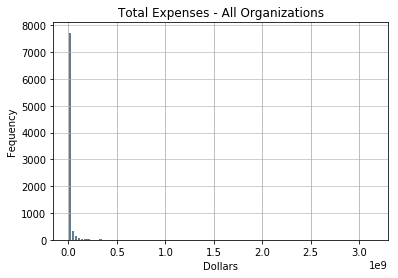

In [13]:
charityDF['tot_exp'].plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e', legend = None)
plt.title('Total Expenses - All Organizations')
plt.xlabel('Dollars')
plt.ylabel('Fequency')
plt.grid(axis='y', alpha=0.75)

#For all charities, the mean total expenses is $14,484,281 with a standard deviation of $69,437,316.  The standard
#deviation is much larger than the mean which indicates a large spread in the data.  By squaring the standard deviation,
#we get a variance of 4,821,540,941,192,939.  I do not think variance is helpful here because the unit would be dollars
#squared.  

### Total Revenue

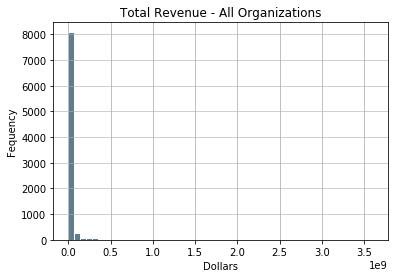

In [14]:
charityDF['tot_rev'].plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e', legend = None)
plt.title('Total Revenue - All Organizations')
plt.xlabel('Dollars')
plt.ylabel('Fequency')
plt.grid(axis='y', alpha=0.75)

#For all charities, the mean total revenue is $15,827,234 with a standard deviation of $75,576,578.  The standard
#deviation is much larger than the mean which indicates a large spread in the data. 

### Net Revenue

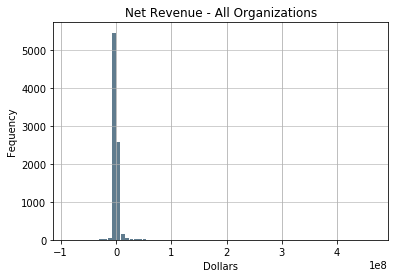

In [15]:
charityDF['net_rev'].plot.hist(grid=True, bins=70, rwidth=0.9,
                   color='#607c8e', legend = None)
plt.title('Net Revenue - All Organizations')
plt.xlabel('Dollars')
plt.ylabel('Fequency')
plt.grid(axis='y', alpha=0.75)

#For all charities, the mean net revenue is $1,342,952 with a standard deviation of $11,567,885.  The standard
#deviation is much larger than the mean which indicates a large spread in the data. The net revenue has more of a
#normal distribution than both the total revenue and total expenses individually.  

### Fundraising Efficiency

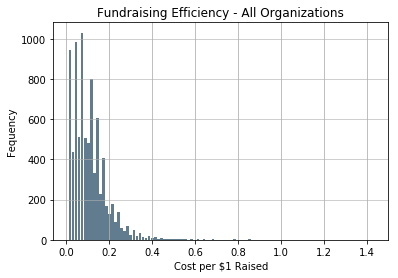

In [16]:
charityDF['fund_eff'].plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e', legend = None)
plt.title('Fundraising Efficiency - All Organizations')
plt.xlabel('Cost per $1 Raised')
plt.ylabel('Fequency')
plt.grid(axis='y', alpha=0.75)

#For all charities, the mean fundraising efficiency is .11 with a standard deviation of .09. The spread for fundraising
#efficiency seems to be smaller than the other variables meaning the data is closer to the mean.  It has a somewhat normal
#distribution but has a positive skew with most of the tail to the right.

### Leader Compensation

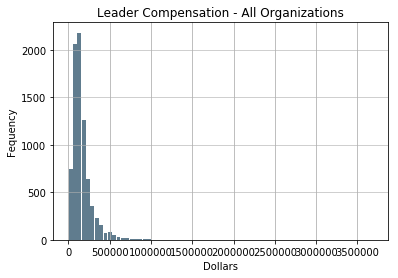

In [17]:
charityDF['leader_comp'].plot.hist(grid=True, bins=70, rwidth=.9,
                   color='#607c8e', legend = None)
plt.title('Leader Compensation - All Organizations')
plt.xlabel('Dollars')
plt.ylabel('Fequency')
plt.grid(axis='y', alpha=0.75)

#For all charities, the mean of leader compensation is $164,159 with a standard deviation of $145,319. What is interesting
#about this to me is that the organizations that have billions in revenue don't seem to skew this distribution as
#much which could mean either the leaders of those organizations still fall close to the majority of the other organizations
#or possibly the null values in leader compensation are pulling them down.

### Administrative Expenses

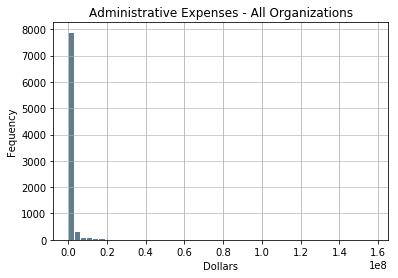

In [18]:
charityDF['admin_exp'].plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e', legend = None)
plt.title('Administrative Expenses - All Organizations')
plt.xlabel('Dollars')
plt.ylabel('Fequency')
plt.grid(axis='y', alpha=0.75)

### Program Expenses

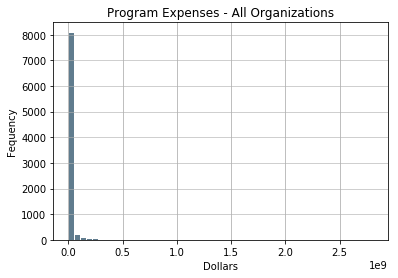

In [19]:
charityDF['program_exp'].plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e', legend = None)
plt.title('Program Expenses - All Organizations')
plt.xlabel('Dollars')
plt.ylabel('Fequency')
plt.grid(axis='y', alpha=0.75)

### Fundraising Expenses

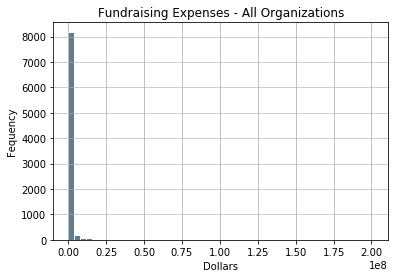

In [20]:
charityDF['fund_exp'].plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e', legend = None)
plt.title('Fundraising Expenses - All Organizations')
plt.xlabel('Dollars')
plt.ylabel('Fequency')
plt.grid(axis='y', alpha=0.75)

In [21]:
#All of the subcategories of expenses follow the same pattern as the overall expenses group with a positively skewed
#distribution and a large spread.

## Outliers

In [22]:
# I reviewed records just in the big category, at the 1M and up and at the 1B and up ranges.
# There doesn't seem to be any arbitrary outliers but rather an entire segment of data that belongs to mega organizations that
# skews the data positively.  Because of this I'm going to break up the datasets by organization size and add another category for 
#organizations over 1B in Revenue or Expenses.  But first, I will review the other outlier

In [23]:
charityDF[(charityDF['tot_exp'] > 1000000000) | (charityDF['tot_rev'] > 1000000000)]

,ein,category,name,ch_size,state,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
1681,53-0242652,Environment,The Nature Conservancy,big,VA,829488331.00,1006241963.00,176753632.00,0.14,788524.00,108662971.36,152625852.90,567370018.40
4232,95-1922279,International,World Vision,big,WA,999702678.00,1038784414.00,39081736.00,0.09,456503.00,92972349.05,57982755.32,847747870.94
4746,06-1008595,International,Americares,big,CT,1927303882.00,2380433798.00,453129916.00,0.01,383477.00,15418431.06,5781911.65,1902248931.53
4777,53-0196605,Human Services,American Red Cross,big,DC,3142984060.00,3608002096.00,465018036.00,0.19,673735.00,201150979.84,125719362.40,2809827749.64
6752,95-1831116,International,Direct Relief,big,CA,1008907873.00,1114256914.00,105349041.00,0.01,444669.00,1008907.87,3026723.62,1002854425.76
6846,04-2263040,Health,Dana-Farber Cancer Institute,big,MA,1528239259.00,1495111225.00,-33128034.00,0.06,660218.00,35149502.96,157408643.68,1334152873.11
7408,36-3673599,Human Services,Feeding America,big,IL,2826138224.00,2827633478.00,1495254.00,0.01,806288.00,25435244.02,8478414.67,2786572288.86


In [24]:
#Another potential outlier issue was null values in the leadership compensation field.  Based on review of the 
#data on charity navigator, this can mean that the data was either not available or the leader did not receive compensation.

#Because there is no way for me to know which it is and I'm going to remove any leader compensation of null or 0 from
# this data.  It will be noted that any stats only apply to charities who disclosed their leaders were compensated. 

In [25]:
#drop the rows with leadership compensation of null
charityDF = charityDF.dropna()

In [26]:
#check for rows with leader compensation = 0
charityDF[charityDF.leader_comp == 0].describe()

,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,10525401.57,11489405.90,964004.33,0.10,0.00,579213.55,784183.92,9147052.50
std,22142774.62,25619302.01,8212978.93,0.10,0.00,1125441.75,1891017.41,20502134.60
min,117858.00,71653.00,-86269334.00,0.01,0.00,1084.91,699.99,35003.83
25%,1789326.25,2000147.75,-200919.50,0.03,0.00,97541.65,141484.41,1374355.84
50%,3616134.00,4007033.50,56899.50,0.07,0.00,244938.08,327619.96,2760129.57
75%,8403194.75,8992909.50,753406.75,0.14,0.00,567204.45,661232.37,7216384.96
max,167243782.00,253449629.00,105279943.00,0.85,0.00,11872910.47,18302799.29,165905831.74


In [27]:
#drop the rows with leader compensation = 0
charityDF = charityDF[charityDF.leader_comp != 0]

In [28]:
#breaking up the remaining charities into their categories
mega_df = charityDF[(charityDF['tot_exp'] > 1000000000) | (charityDF['tot_rev'] > 1000000000)]
big_df = charityDF[(charityDF['ch_size'] == 'big') & ((charityDF['tot_exp'] < 1000000000) & (charityDF['tot_rev'] < 1000000000))]
mid_df = charityDF[charityDF['ch_size'] == 'mid']
small_df = charityDF[charityDF['ch_size'] == 'small']

In [29]:
mega_df.describe()

,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,1751823472.43,1924351984.00,172528511.57,0.07,601916.29,68542626.59,73003380.61,1607253451.18
std,925434549.36,1026828723.26,207434019.56,0.07,172595.24,70884600.12,70766647.15,914885109.86
min,829488331.00,1006241963.00,-33128034.00,0.01,383477.00,1008907.87,3026723.62,567370018.40
25%,1004305275.50,1076520664.00,20288495.00,0.01,450586.00,20426837.54,7130163.16,925301148.35
50%,1528239259.00,1495111225.00,105349041.00,0.06,660218.00,35149502.96,57982755.32,1334152873.11
75%,2376721053.00,2604033638.00,314941774.00,0.12,731129.50,100817660.21,139172607.65,2344410610.20
max,3142984060.00,3608002096.00,465018036.00,0.19,806288.00,201150979.84,157408643.68,2809827749.64


In [30]:
big_df.describe()

,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
count,1364.00,1364.00,1364.00,1364.00,1364.00,1364.00,1364.00,1364.00
mean,57868965.60,62868865.25,4999899.65,0.09,325895.01,3282888.81,4418345.74,50080590.21
std,88594863.56,93535668.26,20509298.69,0.08,246942.43,7933465.97,7312322.77,78289924.41
min,13502997.00,4938024.00,-82444779.00,0.01,900.00,22998.46,41616.16,6973665.85
25%,18828881.25,20080217.00,-660796.75,0.03,180381.00,803784.61,1158383.93,15800174.03
50%,29616145.50,33197314.50,748209.00,0.07,272847.00,1552354.24,2304099.61,24780988.18
75%,60115751.75,66921838.25,4694770.25,0.13,401564.25,2993786.19,4532909.12,50485311.08
max,949377386.00,947679859.00,262737340.00,0.71,3691019.00,174096781.45,91618101.90,904756648.86


In [31]:
mid_df.describe()

,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
count,2697.00,2697.00,2697.00,2697.00,2697.00,2697.00,2697.00,2697.00
mean,6697554.42,7411430.57,713876.16,0.11,171094.21,558816.70,665166.40,5463507.06
std,2703791.51,3873095.89,2536961.42,0.09,84040.32,445306.71,482800.86,2341915.31
min,3500164.00,-2049209.00,-9289321.00,0.01,2692.00,5646.36,19444.97,547536.53
25%,4427435.00,4650636.00,-278668.00,0.05,114581.00,281787.73,339325.75,3558638.52
50%,5899987.00,6297610.00,183273.00,0.09,156728.00,463774.90,538752.01,4797678.19
75%,8497745.00,9336741.00,1030627.00,0.14,209028.00,709233.53,867673.61,6955009.12
max,13499209.00,41890225.00,33102793.00,1.43,755460.00,7421657.94,6522471.86,12969236.83


In [32]:
small_df.describe()

,tot_exp,tot_rev,net_rev,fund_eff,leader_comp,fund_exp,admin_exp,program_exp
count,3530.00,3530.00,3530.00,3530.00,3530.00,3530.00,3530.00,3530.00
mean,2007735.62,2246417.37,238681.75,0.12,112890.23,197551.95,229415.27,1577758.60
std,745717.48,2528875.49,2375262.50,0.09,51839.89,153596.45,148813.30,629346.08
min,168324.00,-700136.00,-2903666.00,0.01,1.00,332.85,334.84,106494.29
25%,1423388.75,1464900.50,-126854.25,0.06,80106.75,95100.14,127228.73,1101748.35
50%,1942978.00,2020870.00,51094.00,0.10,104161.50,164010.25,195942.98,1509573.14
75%,2577382.00,2728400.50,283006.00,0.15,138142.50,261916.73,291496.95,2030465.77
max,3499756.00,132734290.00,129976137.00,1.22,528105.00,2188744.65,1570376.52,3370883.00


Text(0.5, 0.98, 'Organization Size')

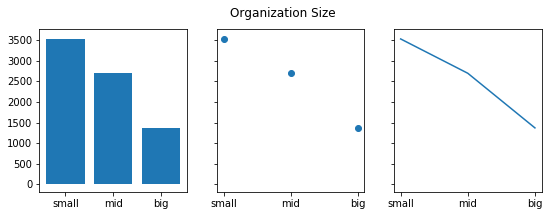

In [33]:
#Plot categorical counts
import matplotlib.pyplot as plt

data = {'small': len(small_df), 'mid': len(mid_df), 'big': len(big_df) + len(mega_df)}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Organization Size')

# PMF

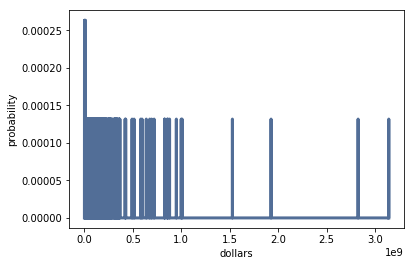

In [34]:
#total expenses all organizations
exp_pmf = thinkstats2.Pmf(charityDF['tot_exp'])
thinkplot.Pmf(exp_pmf)
thinkplot.Config(xlabel = 'dollars', ylabel = 'probability')

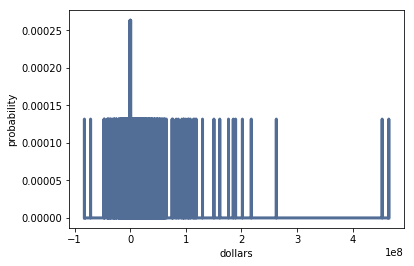

In [35]:
net_rev_pmf = thinkstats2.Pmf(charityDF['net_rev'])
thinkplot.Pmf(net_rev_pmf)
thinkplot.Config(xlabel = 'dollars', ylabel = 'probability')

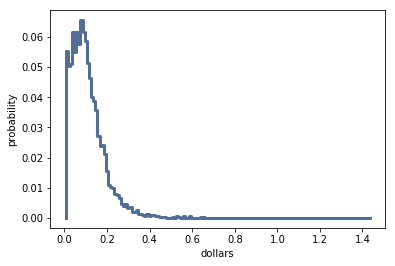

In [36]:
fund_eff_pmf = thinkstats2.Pmf(charityDF['fund_eff'])
thinkplot.Pmf(fund_eff_pmf)
thinkplot.Config(xlabel = 'dollars', ylabel = 'probability')

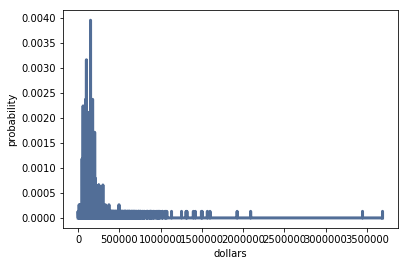

In [37]:
leader_pmf = thinkstats2.Pmf(charityDF['leader_comp'])
thinkplot.Pmf(leader_pmf)
thinkplot.Config(xlabel = 'dollars', ylabel = 'probability')

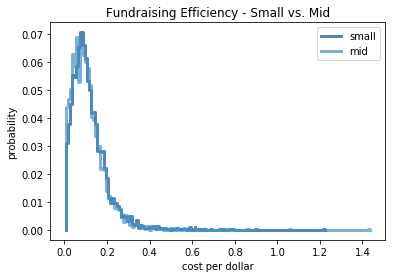

In [38]:
small_pmf = thinkstats2.Pmf(small_df['fund_eff'], label = 'small')
mid_pmf = thinkstats2.Pmf(mid_df['fund_eff'], label = 'mid')
big_pmf = thinkstats2.Pmf(big_df['fund_eff'], label = 'big')
mega_pmf = thinkstats2.Pmf(mega_df['fund_eff'], label = 'mega')

#compare small and mid pmf
thinkplot.PrePlot(2)
#thinkplot.SubPlot(2)
thinkplot.Pmfs([small_pmf, mid_pmf])
thinkplot.Config(title='Fundraising Efficiency - Small vs. Mid', xlabel = 'cost per dollar', ylabel = 'probability', legend = True)

#based on the plot of the pmf - both small and mid sized organizations are just as efficient with fundraising dollars
#with mid level organizations slightly more efficent with a cost per dollar of .1.

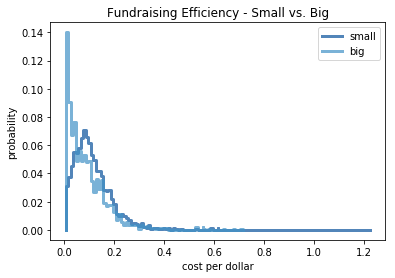

In [39]:
#compare small and big pmf
thinkplot.PrePlot(2)
#thinkplot.SubPlot(2)
thinkplot.Pmfs([small_pmf, big_pmf])
thinkplot.Config(title = 'Fundraising Efficiency - Small vs. Big', xlabel = 'cost per dollar', ylabel = 'probability', legend = True)

#based on the plot of the pmf - smaller organizations are less likely to be as efficient at fundraising based on their mean
#cost per dollar raised of qround .15 where the mean cost per dollar raised is closer to 0 for big organizations.

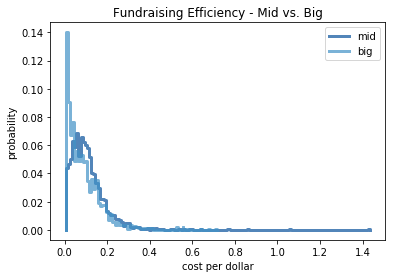

In [40]:
#compare mid and big pmf
thinkplot.PrePlot(2)
#thinkplot.SubPlot(2)
thinkplot.Pmfs([mid_pmf, big_pmf])
thinkplot.Config(title = 'Fundraising Efficiency - Mid vs. Big', xlabel = 'cost per dollar', ylabel = 'probability', legend = True)



#the plot for mid level and big organizations is similar to the small and big. Mid level and small organizations were very close.

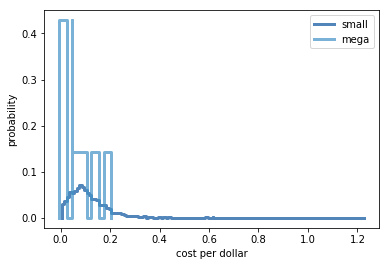

In [41]:
#compare small and mega pmf
thinkplot.PrePlot(2)
#thinkplot.SubPlot(2)
thinkplot.Pmfs([small_pmf, mega_pmf])
thinkplot.Config(xlabel = 'cost per dollar', ylabel = 'probability')

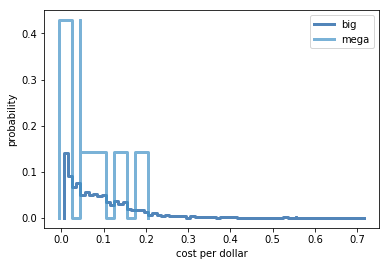

In [42]:
#compare big and mega pmf
thinkplot.PrePlot(2)
#thinkplot.SubPlot(2)
thinkplot.Pmfs([big_pmf, mega_pmf])
thinkplot.Config(xlabel = 'cost per dollar', ylabel = 'probability')

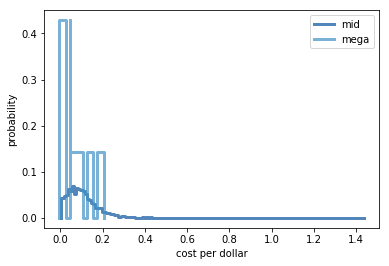

In [43]:
#compare mid and mega pmf
thinkplot.PrePlot(2)
#thinkplot.SubPlot(2)
thinkplot.Pmfs([mid_pmf, mega_pmf])
thinkplot.Config(xlabel = 'cost per dollar', ylabel = 'probability')

In [44]:
#the pmf plot for the mega organizations far overshadows the data for any of the other groups.  They are also showing as more 
#effient at fundraising.

## CDF

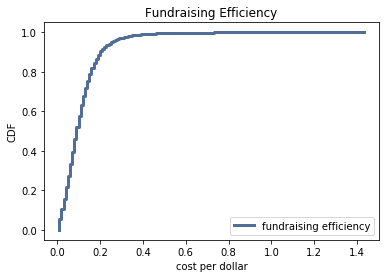

<Figure size 576x432 with 0 Axes>

In [45]:
fund_eff_cdf = thinkstats2.Cdf(charityDF.fund_eff, label = 'fundraising efficiency')
thinkplot.Cdf(fund_eff_cdf)
thinkplot.Show(title="Fundraising Efficiency", xlabel='cost per dollar', ylabel = 'CDF')

In [46]:
#About 80% of the organizations have a fundraising cost of .20 cents on the dollar.  
#There are very few organizations above .70 cents.

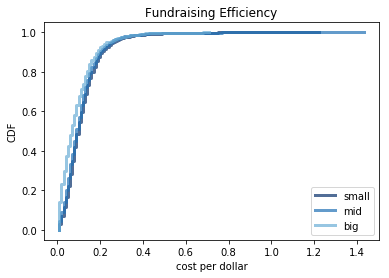

<Figure size 576x432 with 0 Axes>

In [47]:
#comparing cdf
small_cdf = thinkstats2.Cdf(small_df.fund_eff, label = 'small')
mid_cdf = thinkstats2.Cdf(mid_df.fund_eff, label = 'mid')
big_cdf = thinkstats2.Cdf(big_df.fund_eff, label = 'big')
thinkplot.PrePlot(3)
thinkplot.Cdfs([small_cdf, mid_cdf, big_cdf])
thinkplot.Show(title="Fundraising Efficiency", xlabel='cost per dollar', ylabel = 'CDF')


## Analytic Distribution

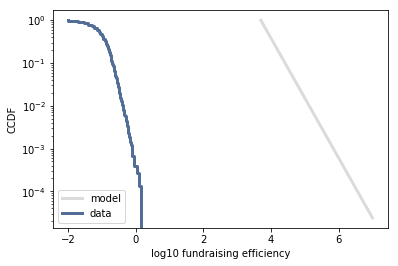

In [48]:
log_char = np.log10(charityDF.fund_eff)
cdf = thinkstats2.Cdf(charityDF.fund_eff, label = 'data')
cdf_log = thinkstats2.Cdf(log_char, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 fundraising efficiency',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

#Pareto distribution is not a fit

Mean, Var 0.10482679914070893 0.0050227680680574
Sigma 0.07087148981118853


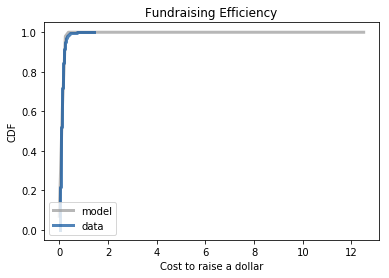

In [49]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(charityDF.fund_eff, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(charityDF.fund_eff, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Fundraising Efficiency',
                 xlabel='Cost to raise a dollar',
                 ylabel='CDF')

In [50]:
#the normal distribution model fits the data

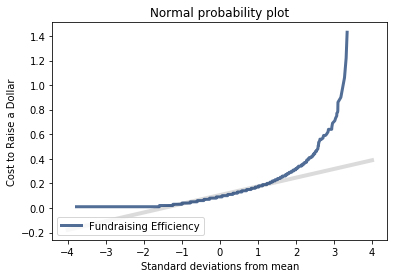

In [51]:
xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mu, sigma)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(charityDF.fund_eff)
thinkplot.Plot(xs, ys, label='Fundraising Efficiency')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Cost to Raise a Dollar')

In [52]:
#the majority of the data line falls  along the model which indicates this is a good enough fit for the data.

## Bivariate Relationships

### Scatterplots

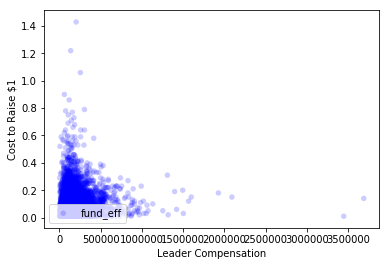

<Figure size 576x432 with 0 Axes>

In [53]:
#initially, I wanted to explore the relationship between leader compensation and fundraising efficience so those are the 
#variables I will plot

fund_eff = charityDF.fund_eff
leader_comp = charityDF.leader_comp

thinkplot.Scatter(leader_comp, fund_eff, alpha = .2)
thinkplot.Show(xlabel = "Leader Compensation", ylabel = 'Cost to Raise $1')

#The fan shape of the plot indicates heteroscedasticity.  I believe this is because the range of values in the 
#independent variable is much larger than the range in the dependent variable.  I decided to transform both variables to 
#get a better picture.

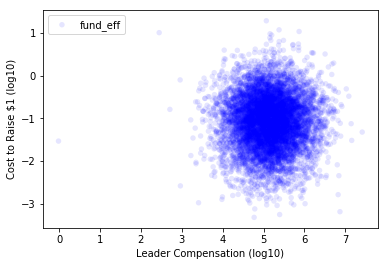

<Figure size 576x432 with 0 Axes>

In [54]:
#to get a better view of the relationship between the variables, I took the log value of leader comp and plot again
log_fund_eff = thinkstats2.Jitter(np.log10(charityDF.fund_eff))
log_leader_comp = thinkstats2.Jitter(np.log10(charityDF.leader_comp))


thinkplot.Scatter(log_leader_comp, log_fund_eff, alpha = .1)
thinkplot.Show(xlabel = "Leader Compensation (log10)", ylabel = 'Cost to Raise $1 (log10)')

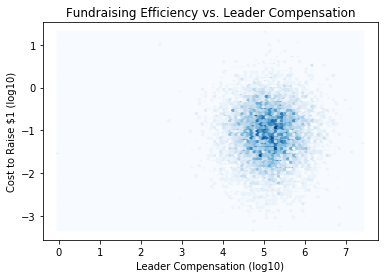

In [55]:
#hexbin distribution to see if i can get a clearer look at any relationships
thinkplot.HexBin(log_leader_comp, log_fund_eff)
thinkplot.Config(title= 'Fundraising Efficiency vs. Leader Compensation', xlabel = "Leader Compensation (log10)", ylabel = 'Cost to Raise $1 (log10)', legend = False)

In [56]:
#I also want to explore the relationship between specific expenses and net revenue.  Does spending more money
#equate to a larger net revenue?

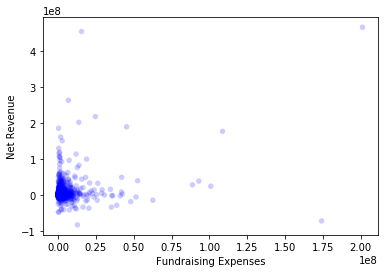

<Figure size 576x432 with 0 Axes>

In [57]:
net_rev = charityDF.net_rev
fund_exp = charityDF.fund_exp

thinkplot.Scatter(fund_exp, net_rev, alpha = .2)
thinkplot.Show(xlabel = "Fundraising Expenses", ylabel = 'Net Revenue')

C:\Users\rvick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
C:\Users\rvick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


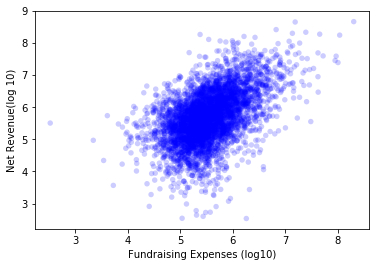

<Figure size 576x432 with 0 Axes>

In [58]:
log_net_rev = np.log10(charityDF.net_rev)
log_fund_exp = np.log10(charityDF.fund_exp)

thinkplot.Scatter(log_fund_exp, log_net_rev, alpha = .2)
thinkplot.Show(xlabel = "Fundraising Expenses (log10)", ylabel = 'Net Revenue(log 10)')

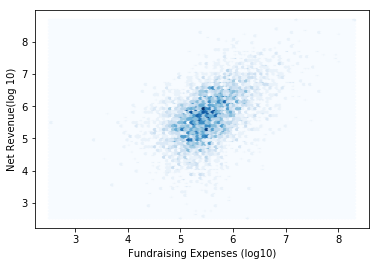

In [59]:
thinkplot.HexBin(log_fund_exp, log_net_rev)
thinkplot.Config(xlabel = "Fundraising Expenses (log10)", ylabel = 'Net Revenue(log 10)', legend = False)

In [60]:
#indicated by the darker colors in the center, it appears that there is a strong positive relationship between the amount
#spent on fundraising and net revenue of the organization

In [61]:
#LEt's look at the other expense buckets
prog_exp = charityDF.program_exp
admin_exp = charityDF.admin_exp

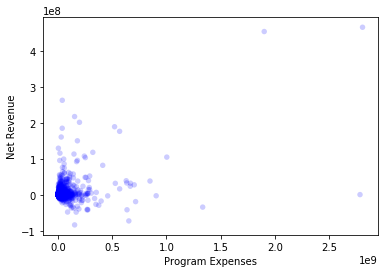

<Figure size 576x432 with 0 Axes>

In [62]:
#program expenses
thinkplot.Scatter(prog_exp, net_rev, alpha = .2)
thinkplot.Show(xlabel = "Program Expenses", ylabel = 'Net Revenue')

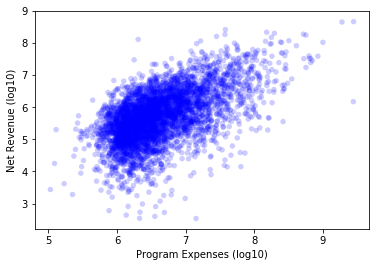

<Figure size 576x432 with 0 Axes>

In [63]:
log_prog_exp = np.log10(prog_exp)

thinkplot.Scatter(log_prog_exp, log_net_rev, alpha = .2)
thinkplot.Show(xlabel = "Program Expenses (log10)", ylabel = 'Net Revenue (log10)')

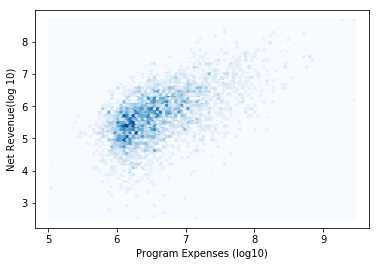

In [64]:
thinkplot.HexBin(log_prog_exp, log_net_rev)
thinkplot.Config(xlabel = "Program Expenses (log10)", ylabel = 'Net Revenue(log 10)', legend = False)

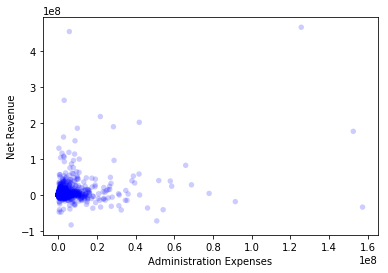

<Figure size 576x432 with 0 Axes>

In [65]:
#administration expenses
thinkplot.Scatter(admin_exp, net_rev, alpha = .2)
thinkplot.Show(xlabel = "Administration Expenses", ylabel = 'Net Revenue')

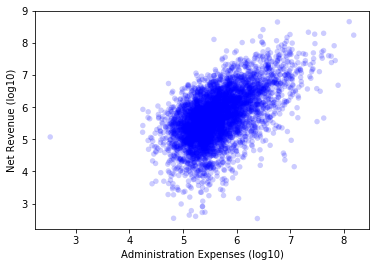

<Figure size 576x432 with 0 Axes>

In [66]:
log_admin_exp = np.log10(admin_exp)

thinkplot.Scatter(log_admin_exp, log_net_rev, alpha = .2)
thinkplot.Show(xlabel = "Administration Expenses (log10)", ylabel = 'Net Revenue (log10)')

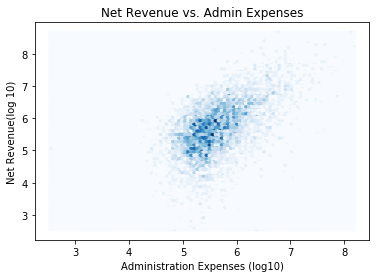

In [67]:
thinkplot.HexBin(log_admin_exp, log_net_rev)
thinkplot.Config(title = 'Net Revenue vs. Admin Expenses', xlabel = "Administration Expenses (log10)", ylabel = 'Net Revenue(log 10)', legend = False)

In [68]:
#I want to explore how size of the organizaiton effects this as well.  Since all of the categories of expenses follow the same
#relationship pattern, I will start with just the overall expenses number and drill down from there if any plots indicate
#unexpected results.  My hypothesis is that the smaller organizations may nto have as strong as relationship, as indicated
#by the pmf plots showing that larger organizations have a better fundraising efficiency

C:\Users\rvick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
C:\Users\rvick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


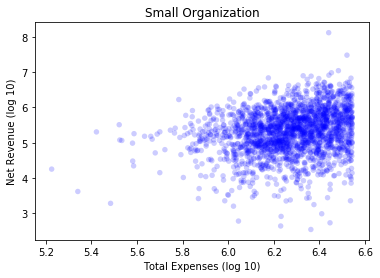

<Figure size 576x432 with 0 Axes>

In [69]:
log_small_netrev = np.log10(small_df.net_rev)
log_small_totexp = np.log10(small_df.tot_exp)

thinkplot.Scatter(log_small_totexp, log_small_netrev, alpha = .2)
thinkplot.Show(title = 'Small Organization', xlabel = "Total Expenses (log 10)", ylabel = 'Net Revenue (log 10)')

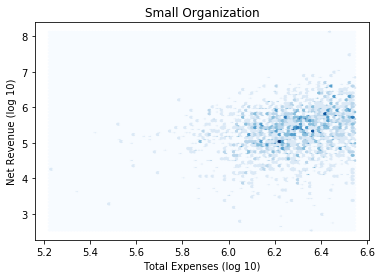

<Figure size 576x432 with 0 Axes>

In [70]:
thinkplot.HexBin(log_small_totexp, log_small_netrev)
thinkplot.Show(title = 'Small Organization', xlabel = "Total Expenses (log 10)", ylabel = 'Net Revenue (log 10)')

C:\Users\rvick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


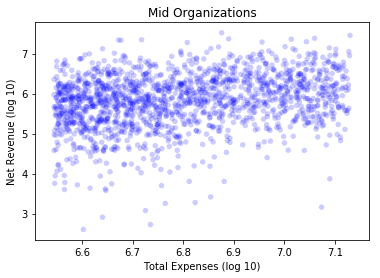

<Figure size 576x432 with 0 Axes>

In [71]:
log_mid_netrev = np.log10(mid_df.net_rev)
log_mid_totexp = np.log10(mid_df.tot_exp)

thinkplot.Scatter(log_mid_totexp, log_mid_netrev, alpha = .2)
thinkplot.Show(title = 'Mid Organizations', xlabel = "Total Expenses (log 10)", ylabel = 'Net Revenue (log 10)')

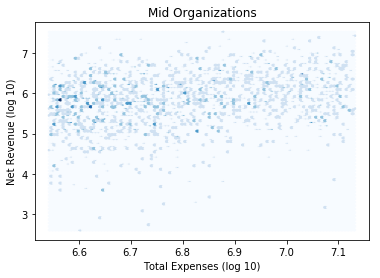

<Figure size 576x432 with 0 Axes>

In [72]:
thinkplot.HexBin(log_mid_totexp, log_mid_netrev)
thinkplot.Show(title = 'Mid Organizations', xlabel = "Total Expenses (log 10)", ylabel = 'Net Revenue (log 10)')

C:\Users\rvick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
C:\Users\rvick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


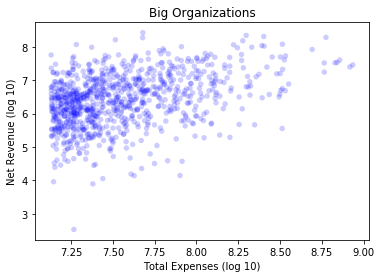

<Figure size 576x432 with 0 Axes>

In [73]:
log_big_netrev = np.log10(big_df.net_rev)
log_big_totexp = np.log10(big_df.tot_exp)

thinkplot.Scatter(log_big_totexp, log_big_netrev, alpha = .2)
thinkplot.Show(title = 'Big Organizations', xlabel = "Total Expenses (log 10)", ylabel = 'Net Revenue (log 10)')

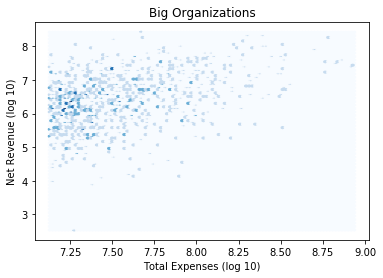

<Figure size 576x432 with 0 Axes>

In [74]:
thinkplot.HexBin(log_big_totexp, log_big_netrev)
thinkplot.Show(title = 'Big Organizations', xlabel = "Total Expenses (log 10)", ylabel = 'Net Revenue (log 10)')

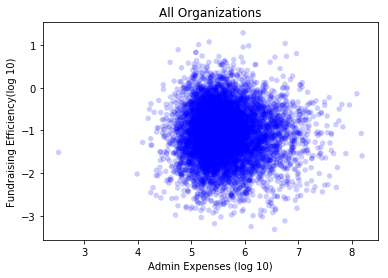

<Figure size 576x432 with 0 Axes>

In [75]:
#fundraising efficiency as a result of admin expenses
thinkplot.Scatter(log_admin_exp, log_fund_eff, alpha = .2)
thinkplot.Show(title = 'All Organizations', xlabel = "Admin Expenses (log 10)", ylabel = 'Fundraising Efficiency(log 10)')

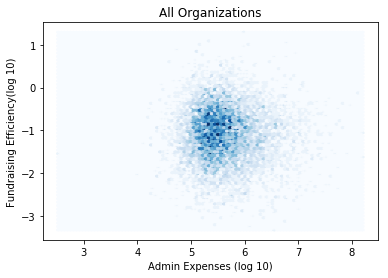

<Figure size 576x432 with 0 Axes>

In [76]:
thinkplot.HexBin(log_admin_exp, log_fund_eff)
thinkplot.Show(title = 'All Organizations', xlabel = "Admin Expenses (log 10)", ylabel = 'Fundraising Efficiency(log 10)', legend = False)

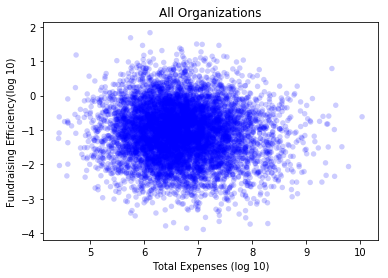

<Figure size 576x432 with 0 Axes>

In [77]:
#total expenses on fundraising efficiency
log_tot_exp = np.log10(charityDF.tot_exp)

thinkplot.Scatter(thinkstats2.Jitter(log_tot_exp), thinkstats2.Jitter(log_fund_eff), alpha = .2)
thinkplot.Show(title = 'All Organizations', xlabel = "Total Expenses (log 10)", ylabel = 'Fundraising Efficiency(log 10)')

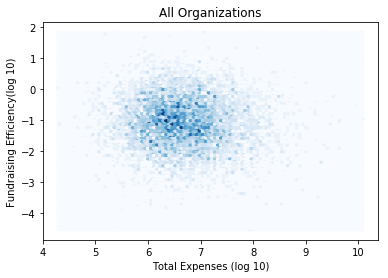

<Figure size 576x432 with 0 Axes>

In [78]:
thinkplot.HexBin(thinkstats2.Jitter(log_tot_exp), thinkstats2.Jitter(log_fund_eff))
thinkplot.Show(title = 'All Organizations', xlabel = "Total Expenses (log 10)", ylabel = 'Fundraising Efficiency(log 10)', legend = False)

In [79]:
#This appears to be a negative relationship, which makes sense.  As the expenses gets larger, fundraising efficiency goes down.
#A lower fundraisinge efficiency means they are spending less to make a dollar.  ORganizaitons are split into categories
#by expenses, which means organizations with larger expenses are considered big.  Looking at this together indicates that
#larger organizations are mroe efficient at raising money.

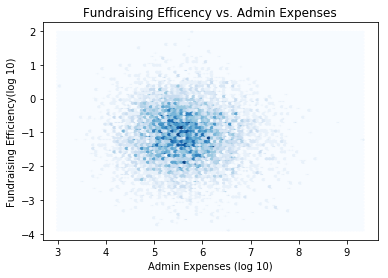

<Figure size 576x432 with 0 Axes>

In [80]:
thinkplot.HexBin(thinkstats2.Jitter(log_admin_exp), thinkstats2.Jitter(log_fund_eff))
thinkplot.Show(title = 'Fundraising Efficency vs. Admin Expenses', xlabel = "Admin Expenses (log 10)", ylabel = 'Fundraising Efficiency(log 10)', legend = False)

### Covariance and Correlation

In [81]:
#fundraising efficiency and leader compensation for all organizations
thinkstats2.Cov(leader_comp, fund_eff), thinkstats2.Corr(leader_comp, fund_eff)

#The correlation coefficient is very small and postive.  Before making a conclusion on the impact, I will also calcuate
#spearman's rank correlation

(130.38061911718643, 0.010511169910555932)

In [82]:
thinkstats2.SpearmanCorr(leader_comp, fund_eff)

#it is slightly higher but still so close to 0 that it would indicate it does not have much of an effect on fundraising efficiency

0.05728220802269158

In [83]:
#total expenses and fundraising efficiency for all organizations
tot_exp = charityDF.tot_exp

thinkstats2.Cov(tot_exp, fund_eff), thinkstats2.Corr(tot_exp, fund_eff)

#the negative relationship means that as total expenses increase, the cost to raise a dollar decreases

(-362994.9807955569, -0.0579269467930983)

In [84]:
#fundraising expenses and net revenue for all organizations
thinkstats2.Cov(fund_exp, net_rev), thinkstats2.Corr(fund_exp, net_rev)

#moderately strong positive relationsip, as fundraising expenses increase, cost to raise a dollar increases

(19318017626264.207, 0.3520744310982489)

In [85]:
#program expenses and net revenue for all organizations
thinkstats2.Cov(prog_exp, net_rev), thinkstats2.Corr(prog_exp, net_rev)

#also moderately strong positive, as programming expenses increase, cost to raise a dollar increases

(377157522311913.1, 0.47139772919369766)

In [86]:
#admin expenses and net revenue for all organizations
thinkstats2.Cov(admin_exp, net_rev), thinkstats2.Corr(admin_exp, net_rev), thinkstats2.SpearmanCorr(admin_exp, net_rev)

#also moderately strong positive relationship, as admin expensees increase, cost to raise a dollar increases

(17741499414399.996, 0.3237714150051184, 0.14466627482696878)

In [87]:
#but what about total admin expenses and fundraising efficiency?  If the staff is paid more and money is spent internally, 
#do organizations tend to raise more.

In [88]:
thinkstats2.Cov(admin_exp, fund_eff), thinkstats2.Corr(admin_exp, fund_eff), thinkstats2.SpearmanCorr(admin_exp, fund_eff)

# it actually has a slightly negative relationship, indicatign that as admin expenses increase, the cost to raise a dollar
# decreases. A lower cost per dollar is better.  

(-8848.490553398651, -0.022544444011291007, -0.005438342308896433)

## Hypothesis Testing

### Fundraising Efficiency between big and small organizations

In [89]:
#Larger organizations are more efficient at raising money
#test statistic - fund efficieny mean
#null hypothesis - the size of the organization has no effect on their fundraising efficiency
import hypothesis as hyp

data = small_df.fund_eff.values, big_df.fund_eff.values
ht = hyp.DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

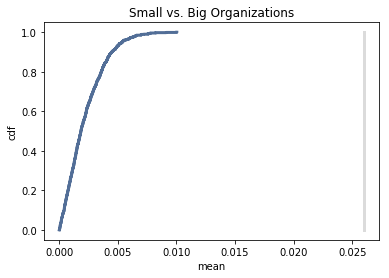

<Figure size 576x432 with 0 Axes>

In [90]:
ht.PlotCdf()
thinkplot.Show(title='Small vs. Big Organizations', xlabel='mean', ylabel = 'cdf')

In [91]:
#The p value of 0 indicates the difference in fundraising efficiency between small and big organizations is statistically
#significant because p < .001. 

In [92]:
#performing the same test for small and mid since their pmf's were almost the same.
data = small_df.fund_eff.values, mid_df.fund_eff.values
ht = hyp.DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.003

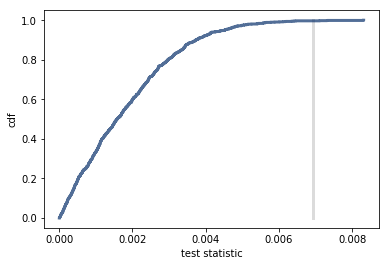

<Figure size 576x432 with 0 Axes>

In [93]:
ht.PlotCdf()
thinkplot.Show(xlabel='test statistic', ylabel = 'cdf')

In [94]:
#THis pvalue is less than .005 which is still low enough to be statistically significate which means the difference is not 
#likely to happen by chance

### Testing the Correlation between Admin Expenses and Fundraising efficiency

In [95]:
#Admin expenses have an impact on fundraising efficiency, the cost to raise a dollar.
#test statistic - pearson's correlation
#null hypothesis - the admin expenses have no effect on fundraising efficiency 

In [96]:
cleaned = charityDF.dropna(subset=['admin_exp', 'fund_exp'])
data = cleaned.admin_exp.values, cleaned.fund_eff.values
ht = hyp.CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.046

In [97]:
ht.actual, ht.MaxTestStat()

(0.022544444011291007, 0.03983897991582946)

In [98]:
#the p value is less than .05 which is still considered statistically significant. Also, the max correlation
#out of 1000 iterations is relatively close to the actual which supports that this correlation is not likely due to chance.

#At first the positive value of the actual correlationt threw me for a loop but after reviewing the code, 
#i could see that the function took the absolute value of the correlation.  At first I thought it could have been due to 
#removing the nulls here but not in the original plot.  For safe measure, I'm recalculating below with null values
# removed.  

In [99]:

thinkstats2.Cov(cleaned.admin_exp.values, cleaned.fund_eff.values), thinkstats2.Corr(cleaned.admin_exp.values, cleaned.fund_eff.values)

(-8848.490553398651, -0.022544444011291007)

## Regression Analysis

### Ability to raise money based on the size of the organization (measured by total expenses).  

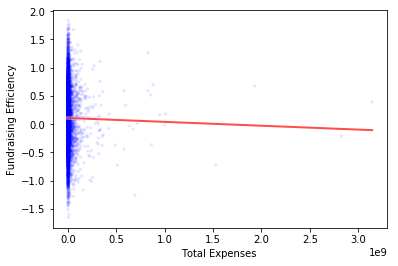

In [100]:
#Regression analysis
# it was easier to see the model compared to the data when plotting the log of both expenses and fundraising efficiency
# but I was worried it would affect the results 
tot_exp = cleaned.tot_exp.values
fund_eff = cleaned.fund_eff.values
                    
inter,slope = thinkstats2.LeastSquares(tot_exp, fund_eff)
fit_xs, fit_ys = thinkstats2.FitLine(tot_exp, inter, slope)
thinkplot.Scatter(thinkstats2.Jitter(tot_exp), thinkstats2.Jitter(fund_eff), color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Total Expenses ",
                 ylabel='Fundraising Efficiency',
                 legend=False)

#the model appears to fit the data.  


In [101]:
import linear

ht = linear.SlopeTest((tot_exp, fund_eff))
pvalue = ht.PValue()
pvalue, ht.actual, ht.MaxTestStat()

(1.0, -6.850203232169104e-11, 6.801447623402227e-11)

In [102]:
#the p value is high at 1 which is high which means the effect could likely be due to chance.  I'm looking at the
#relationship between admin expenses and net revenue

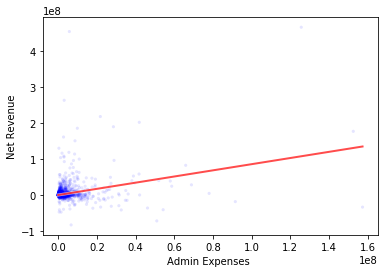

In [103]:
#net revenue as a function of admin expenses
admin_exp = cleaned.admin_exp.values
net_rev = cleaned.net_rev.values
                    
inter,slope = thinkstats2.LeastSquares(admin_exp, net_rev)
fit_xs, fit_ys = thinkstats2.FitLine(admin_exp, inter, slope)
thinkplot.Scatter(thinkstats2.Jitter(admin_exp), thinkstats2.Jitter(net_rev), color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Admin Expenses ",
                 ylabel='Net Revenue',
                 legend=False)

In [104]:
ht = linear.SlopeTest((admin_exp, net_rev))
pvalue = ht.PValue()
pvalue, ht.actual, ht.MaxTestStat()

(0.0, 0.8534415764531007, 0.1761322764679323)

In [105]:
#the p value is less than .05 which is still considered statistically significant. Also, the max correlation
#out of 1000 iterations is relatively close to the actual which supports that this correlation is not likely due to chance.

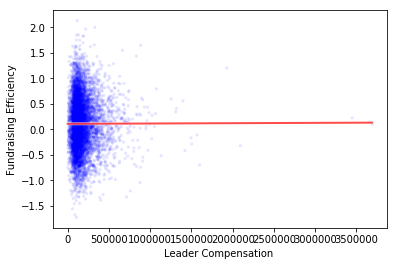

In [106]:

leader_comp = cleaned.leader_comp.values
fund_eff = cleaned.fund_eff.values
                    
inter,slope = thinkstats2.LeastSquares(leader_comp, fund_eff)
fit_xs, fit_ys = thinkstats2.FitLine(leader_comp, inter, slope)
thinkplot.Scatter(thinkstats2.Jitter(leader_comp), thinkstats2.Jitter(fund_eff), color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Leader Compensation ",
                 ylabel='Fundraising Efficiency',
                 legend=False)

In [107]:
ht = linear.SlopeTest((leader_comp, fund_eff))
pvalue = ht.PValue()
pvalue, ht.actual, ht.MaxTestStat()

(0.167, 6.279598448516176e-09, 3.4162447335785154e-08)

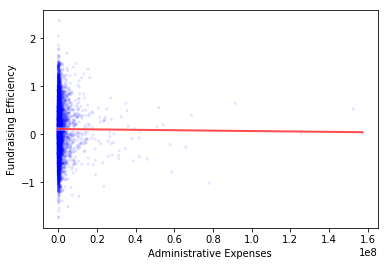

In [108]:

admin_exp = cleaned.admin_exp.values
fund_eff = cleaned.fund_eff.values
                    
inter,slope = thinkstats2.LeastSquares(admin_exp, fund_eff)
fit_xs, fit_ys = thinkstats2.FitLine(admin_exp, inter, slope)
thinkplot.Scatter(thinkstats2.Jitter(admin_exp), thinkstats2.Jitter(fund_eff), color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Administrative Expenses",
                 ylabel='Fundraising Efficiency',
                 legend=False)
 


In [109]:
ht = linear.SlopeTest((admin_exp, fund_eff))
pvalue = ht.PValue()
pvalue, ht.actual, ht.MaxTestStat()

(0.989, -4.2565002826049506e-10, 7.79520185162271e-10)